zadanie 2.1

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import signal

In [98]:
l = 1
m = 9
J = 1
g = 9.81
d = 0.5

In [99]:
def wahadlo_nieliniowe(x, t, u):
    theta = x[0]
    dtheta = x[1]
    
    d2theta = u/J - d*dtheta/J - m*g*l*np.sin(theta)/J
    
    return [dtheta, d2theta]

In [100]:
x0_theta = np.pi
x0_dtheta = 0
u0 = 0

A = np.array([[0, 1],
              [-m*g*l*np.cos(x0_theta)/J, -d/J]])
B = np.array([[0], [1/J]])
C = [1, 0]
D = 0

print("Linearyzacja względem punktu (π, 0), u₀=0:")
print(f"A = \n{A}")
print(f"B = {B.flatten()}")

wartosci_wlasne = np.linalg.eigvals(A)
print(f"\nWartości własne macierzy A:")
print(wartosci_wlasne)
print(f"\nUkład jest {'NIESTABILNY' if np.any(wartosci_wlasne.real > 0) else 'stabilny'}")

model_liniowy = signal.StateSpace(A, B, C, D)

Linearyzacja względem punktu (π, 0), u₀=0:
A = 
[[ 0.    1.  ]
 [88.29 -0.5 ]]
B = [0. 1.]

Wartości własne macierzy A:
[ 9.14960106 -9.64960106]

Układ jest NIESTABILNY


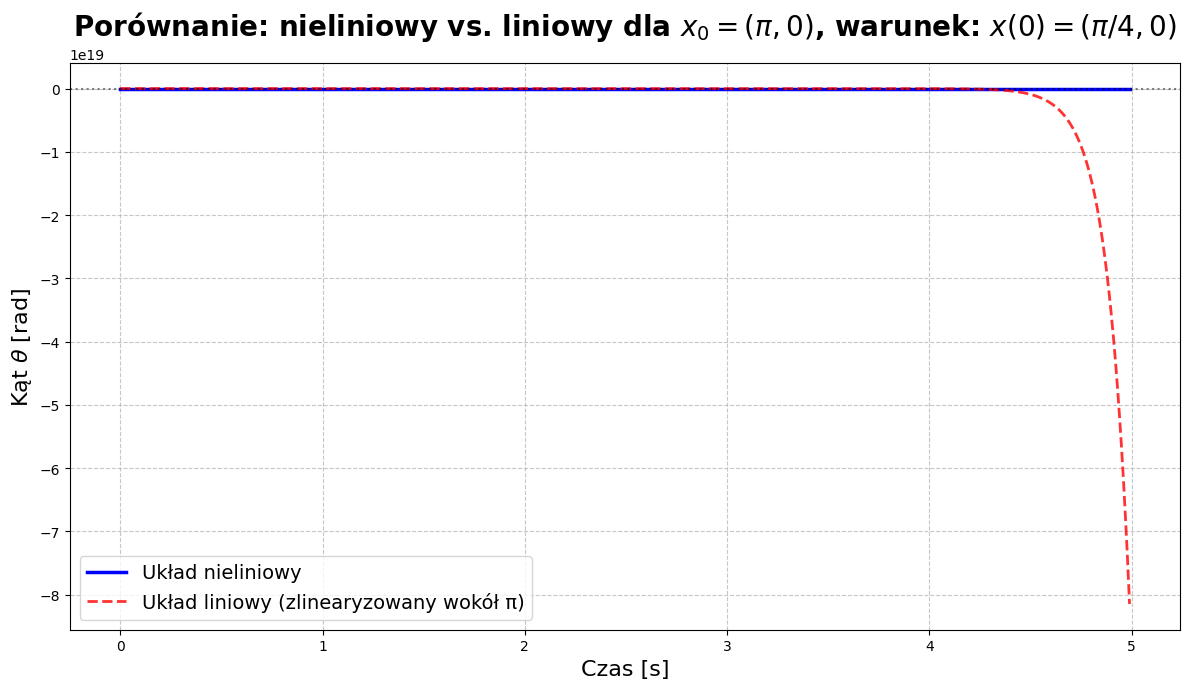


OBSERWACJE:
1) Przebiegi NIE pokrywają się
2) Układ nieliniowy oscyluje wokół pozycji dolnej (θ=0)
3) Układ liniowy EKSPLODUJE do nieskończoności (niestabilny!)
4) Przyczyna: punkt (π,0) to wahadło w GÓRZE - niestabilny punkt równowagi
5) Wartość własna λ₁=9.15 > 0 → wykładniczy wzrost


In [101]:
t = np.arange(0, 5, 0.01)

x_poczatkowe = [np.pi/4, 0]

sol_nl = odeint(wahadlo_nieliniowe, x_poczatkowe, t, args=(0,))

x_lin_poczatkowe = [x_poczatkowe[0] - x0_theta, x_poczatkowe[1] - x0_dtheta]
t_res, x_lin, _ = signal.lsim(model_liniowy, np.zeros(len(t)), T=t, X0=x_lin_poczatkowe)
x_lin_abs = x_lin + x0_theta

plt.figure(figsize=(12, 7))

plt.plot(t, sol_nl[:, 0], color='blue', linestyle='-', linewidth=2.5, 
         label='Układ nieliniowy')
plt.plot(t, x_lin_abs, color='red', linestyle='--', linewidth=2, 
         alpha=0.8, label='Układ liniowy (zlinearyzowany wokół π)')

plt.title(r'Porównanie: nieliniowy vs. liniowy dla $x_0=(\pi, 0)$, warunek: $x(0)=(\pi/4, 0)$', 
          fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Kąt $\\theta$ [rad]', fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=np.pi, color='black', linestyle=':', linewidth=1.5, alpha=0.5, label='Punkt linearyzacji (π)')
plt.tight_layout()
plt.show()

print("\nOBSERWACJE:")
print("1) Przebiegi NIE pokrywają się")
print("2) Układ nieliniowy oscyluje wokół pozycji dolnej (θ=0)")
print("3) Układ liniowy EKSPLODUJE do nieskończoności (niestabilny!)")
print("4) Przyczyna: punkt (π,0) to wahadło w GÓRZE - niestabilny punkt równowagi")
print(f"5) Wartość własna λ₁={wartosci_wlasne[0]:.2f} > 0 → wykładniczy wzrost")

zadanie 2.2

In [102]:
from scipy.linalg import solve_continuous_are

Q = np.eye(2)
R = np.array([[1]])

P = solve_continuous_are(A, B, Q, R)

K = R.T @ B.T @ P

print("Wyznaczone wzmocnienia regulatora LQR:")
print(f"K = {K.flatten()}")
print(f"\nMacierz P z równania Riccati'ego:")
print(P)

Wyznaczone wzmocnienia regulatora LQR:
K = [176.58566297  18.326081  ]

Macierz P z równania Riccati'ego:
[[1706.4063034   176.58566297]
 [ 176.58566297   18.326081  ]]


In [103]:
def wahadlo_z_lqr(x, t):
    theta = x[0]
    dtheta = x[1]
    
    x_odchylka = np.array([[theta - x0_theta], [dtheta - x0_dtheta]])
    u = -K @ x_odchylka + u0
    u = u[0, 0]
    
    d2theta = u/J - d*dtheta/J - m*g*l*np.sin(theta)/J
    
    return [dtheta, d2theta]

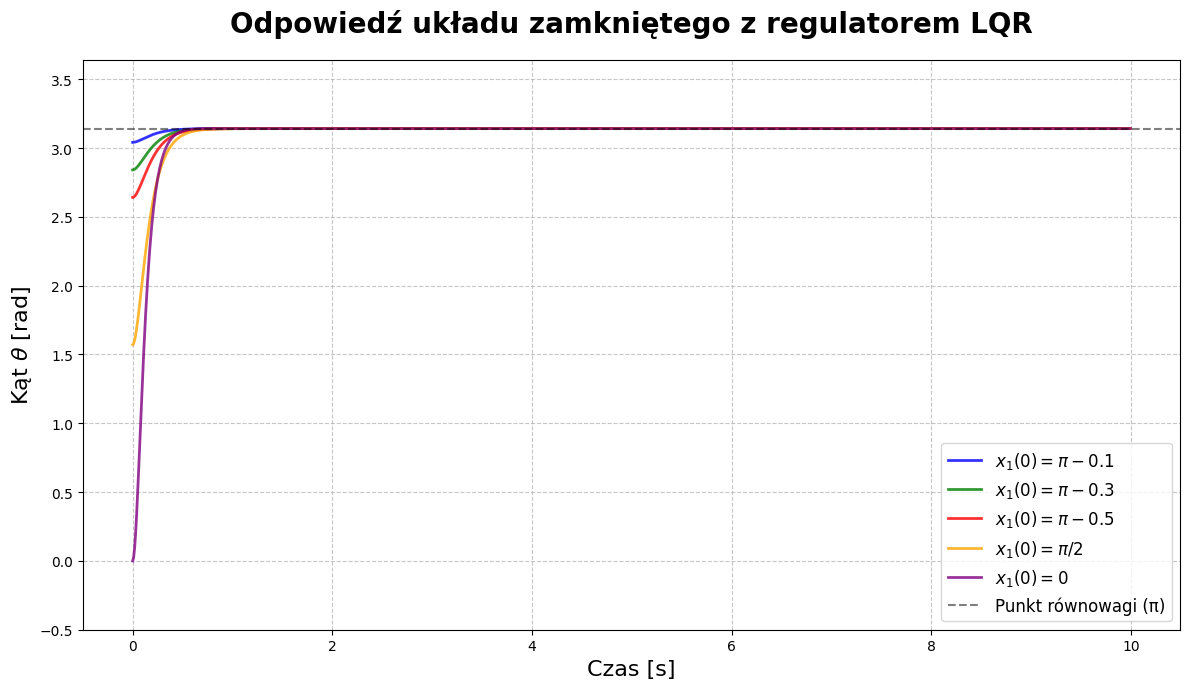


WARTOŚCI USTALONE:
$x_1(0) = \pi - 0.1$: θ_ust = 3.1416 rad = 180.00°
$x_1(0) = \pi - 0.3$: θ_ust = 3.1416 rad = 180.00°
$x_1(0) = \pi - 0.5$: θ_ust = 3.1416 rad = 180.00°
$x_1(0) = \pi/2$: θ_ust = 3.1416 rad = 180.00°
$x_1(0) = 0$: θ_ust = 3.1416 rad = 180.00°


In [104]:
t_sim = np.arange(0, 10, 0.01)

warunki = [
    [np.pi - 0.1, 0],
    [np.pi - 0.3, 0],
    [np.pi - 0.5, 0],
    [np.pi/2, 0],
    [0, 0]
]

etykiety = [
    r'$x_1(0) = \pi - 0.1$',
    r'$x_1(0) = \pi - 0.3$',
    r'$x_1(0) = \pi - 0.5$',
    r'$x_1(0) = \pi/2$',
    r'$x_1(0) = 0$'
]

kolory = ['blue', 'green', 'red', 'orange', 'purple']

rozwiazania = []
for war in warunki:
    sol = odeint(wahadlo_z_lqr, war, t_sim)
    rozwiazania.append(sol)

plt.figure(figsize=(12, 7))

for i, (sol, etykieta, kolor) in enumerate(zip(rozwiazania, etykiety, kolory)):
    plt.plot(t_sim, sol[:, 0], color=kolor, linestyle='-', linewidth=2, 
             label=etykieta, alpha=0.8)

plt.axhline(y=np.pi, color='black', linestyle='--', linewidth=1.5, alpha=0.5, 
            label='Punkt równowagi (π)')
plt.title('Odpowiedź układu zamkniętego z regulatorem LQR', 
          fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Kąt $\\theta$ [rad]', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(-0.5, np.pi + 0.5)
plt.tight_layout()
plt.show()

print("\nWARTOŚCI USTALONE:")
for i, (war, etykieta) in enumerate(zip(warunki, etykiety)):
    wartosc_ustalona = rozwiazania[i][-1, 0]
    print(f"{etykieta}: θ_ust = {wartosc_ustalona:.4f} rad = {np.degrees(wartosc_ustalona):.2f}°")

Wykres zapisany jako lqr-wahadlo-warunki.png


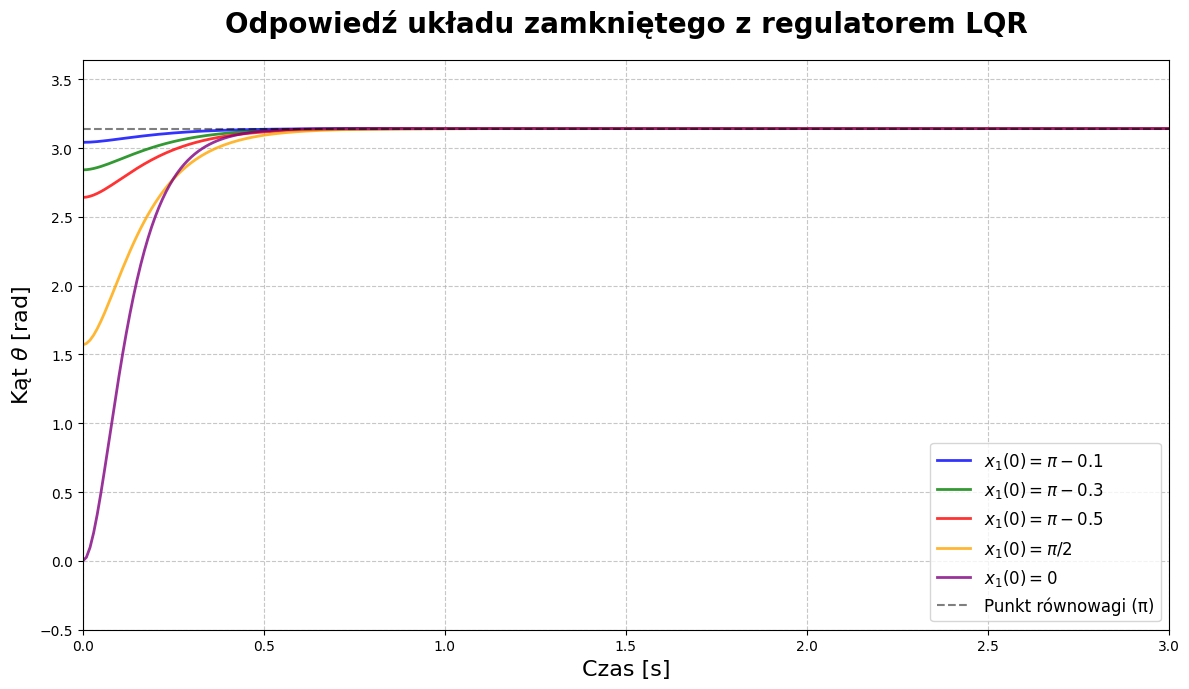

In [105]:
plt.figure(figsize=(12, 7))

for i, (sol, etykieta, kolor) in enumerate(zip(rozwiazania, etykiety, kolory)):
    plt.plot(t_sim, sol[:, 0], color=kolor, linestyle='-', linewidth=2, 
             label=etykieta, alpha=0.8)

plt.axhline(y=np.pi, color='black', linestyle='--', linewidth=1.5, alpha=0.5, 
            label='Punkt równowagi (π)')
plt.title('Odpowiedź układu zamkniętego z regulatorem LQR', 
          fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Czas [s]', fontsize=16)
plt.ylabel('Kąt $\\theta$ [rad]', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(-0.5, np.pi + 0.5)
plt.xlim(0,3)
plt.tight_layout()
plt.savefig('../sprawko-2/lqr-wahadlo-warunki.png', dpi=300, bbox_inches='tight')
print("Wykres zapisany jako lqr-wahadlo-warunki.png")

In [106]:
print("\n" + "="*70)
print("ODPOWIEDZI NA PYTANIA:")
print("="*70)

print("\n1) Czy zadanie stabilizacji układu realizowane jest poprawnie?")
print("   Jaka jest wartość ustalona obu zmiennych stanu? Dlaczego?")
print()
print("   - Dla małych odchyleń (π-0.1, π-0.3, π-0.5): TAK, stabilizacja działa")
print("     Układ dąży do punktu równowagi θ=π (wahadło w górze)")
print("     Wartość ustalona: θ ≈ π, dθ/dt ≈ 0")
print()
print("   - Dla dużych odchyleń (π/2, 0): NIE, regulator nie radzi sobie")
print("     Wahadło pada w dół i oscyluje lub ustala się w pozycji dolnej")
print("     Wartość ustalona: θ ≈ 0 (wahadło w dole)")
print()
print("   DLACZEGO?")
print("   Regulator LQR został zaprojektowany dla liniowej aproksymacji")
print("   wokół punktu (π, 0). Linearyzacja jest LOKALNA - działa tylko")
print("   w małym obszarze wokół punktu równowagi. Dla dużych odchyleń")
print("   model liniowy nie opisuje już rzeczywistej dynamiki nieliniowej.")

print("\n2) Czy zaimplementowany sterownik gwarantuje globalną stabilność układu?")
print()
print("   NIE - rozwiązanie jest LOKALNE, nie globalne.")
print()
print("   UZASADNIENIE:")
print("   - Regulator działa tylko dla warunków początkowych bliskich π")
print("   - Dla dużych odchyleń (|θ-π| > ~0.5 rad) traci skuteczność")
print("   - Wahadło pada zamiast zostać ustabilizowane w górze")
print("   - To typowe ograniczenie metod linearyzacyjnych")
print()
print("   OBSZAR PRZYCIĄGANIA:")
print("   Regulator LQR stabilizuje wahadło tylko w pewnym obszarze")
print("   wokół punktu π. Poza tym obszarem nieliniowość dominuje")
print("   i sterowanie przestaje być efektywne.")


ODPOWIEDZI NA PYTANIA:

1) Czy zadanie stabilizacji układu realizowane jest poprawnie?
   Jaka jest wartość ustalona obu zmiennych stanu? Dlaczego?

   - Dla małych odchyleń (π-0.1, π-0.3, π-0.5): TAK, stabilizacja działa
     Układ dąży do punktu równowagi θ=π (wahadło w górze)
     Wartość ustalona: θ ≈ π, dθ/dt ≈ 0

   - Dla dużych odchyleń (π/2, 0): NIE, regulator nie radzi sobie
     Wahadło pada w dół i oscyluje lub ustala się w pozycji dolnej
     Wartość ustalona: θ ≈ 0 (wahadło w dole)

   DLACZEGO?
   Regulator LQR został zaprojektowany dla liniowej aproksymacji
   wokół punktu (π, 0). Linearyzacja jest LOKALNA - działa tylko
   w małym obszarze wokół punktu równowagi. Dla dużych odchyleń
   model liniowy nie opisuje już rzeczywistej dynamiki nieliniowej.

2) Czy zaimplementowany sterownik gwarantuje globalną stabilność układu?

   NIE - rozwiązanie jest LOKALNE, nie globalne.

   UZASADNIENIE:
   - Regulator działa tylko dla warunków początkowych bliskich π
   - Dla dużych 

zadanie 3.4 (eksport wykresów dla raportu)

In [107]:
# Parametry manipulatora
J1 = 0.5
J2 = 0.5
k = 100
c = 1

# Macierze układu manipulatora
A_manip = np.array([[0, 1, 0, 0],
                     [-k/J1, -c/J1, k/J1, c/J1],
                     [0, 0, 0, 1],
                     [k/J2, c/J2, -k/J2, -c/J2]])

B_manip = np.array([[0], [1/J1], [0], [0]])

print("Model manipulatora:")
print(f"A = \n{A_manip}")
print(f"\nB = {B_manip.flatten()}")

# Sprawdzenie sterowności
from numpy.linalg import matrix_rank

S_manip = B_manip
for i in range(1, 4):
    S_manip = np.hstack([S_manip, np.linalg.matrix_power(A_manip, i) @ B_manip])

print(f"\nRząd macierzy sterowności: {matrix_rank(S_manip)}")
print(f"Układ jest {'sterowalny' if matrix_rank(S_manip) == 4 else 'NIEsterowalny'}")

Model manipulatora:
A = 
[[   0.    1.    0.    0.]
 [-200.   -2.  200.    2.]
 [   0.    0.    0.    1.]
 [ 200.    2. -200.   -2.]]

B = [0. 2. 0. 0.]

Rząd macierzy sterowności: 4
Układ jest sterowalny


In [108]:
# Wagi dla LQR
Q_manip = np.eye(4)
R_manip = np.array([[1]])

# Regulator LQR z nieskończonym horyzontem
P_inf = solve_continuous_are(A_manip, B_manip, Q_manip, R_manip)
K_inf = R_manip.T @ B_manip.T @ P_inf

print("Regulator LQR z nieskończonym horyzontem:")
print(f"K = {K_inf.flatten()}")
print(f"\nMacierz P:")
print(P_inf)

Regulator LQR z nieskończonym horyzontem:
K = [0.97011547 1.21971184 0.44409809 0.97850258]

Macierz P:
[[ 25.30448106   0.48505773 -23.58326754   0.48491055]
 [  0.48505773   0.60985592   0.22204905   0.48925129]
 [-23.58326754   0.22204905  24.97079867   0.22405599]
 [  0.48491055   0.48925129   0.22405599   0.61191246]]


In [109]:
from scipy.integrate import solve_ivp

# Regulator LQR ze skończonym horyzontem
def riccati_eq(t, P_flat):
    P = P_flat.reshape((4, 4))
    dP = -P @ A_manip - A_manip.T @ P + P @ B_manip @ np.linalg.inv(R_manip) @ B_manip.T @ P - Q_manip
    return dP.flatten()

# Symulacja wstecz od t1 do 0
t1 = 5.0
t_span = (t1, 0)
t_eval = np.linspace(t1, 0, 500)

S = np.eye(4)  # Macierz wagi końcowej
P0 = S.flatten()

sol_ricc = solve_ivp(riccati_eq, t_span, P0, t_eval=t_eval, method='RK45')

# Odwrócenie czasu (bo symulowaliśmy wstecz)
t_ricc = t1 - sol_ricc.t[::-1]
P_t = sol_ricc.y[:, ::-1]

print(f"Rozwiązano równanie Riccati'ego dla t ∈ [0, {t1}]")
print(f"Liczba punktów: {len(t_ricc)}")

Rozwiązano równanie Riccati'ego dla t ∈ [0, 5.0]
Liczba punktów: 500


In [110]:
# Funkcja interpolująca K(t) dla skończonego horyzontu
from scipy.interpolate import interp1d

def get_K_finite(t):
    if t >= t1:
        return K_inf.flatten()
    
    idx = np.searchsorted(t_ricc, t)
    if idx >= len(t_ricc):
        idx = len(t_ricc) - 1
    
    P_current = P_t[:, idx].reshape((4, 4))
    K_t = R_manip.T @ B_manip.T @ P_current
    return K_t.flatten()

# Modele manipulatora z regulatorami
def manipulator_inf(x, t):
    u = -K_inf @ x.reshape(-1, 1)
    u = u[0, 0]
    dx = A_manip @ x + B_manip.flatten() * u
    return dx

def manipulator_finite(x, t):
    K_t = get_K_finite(t)
    u = -K_t @ x
    dx = A_manip @ x + B_manip.flatten() * u
    return dx

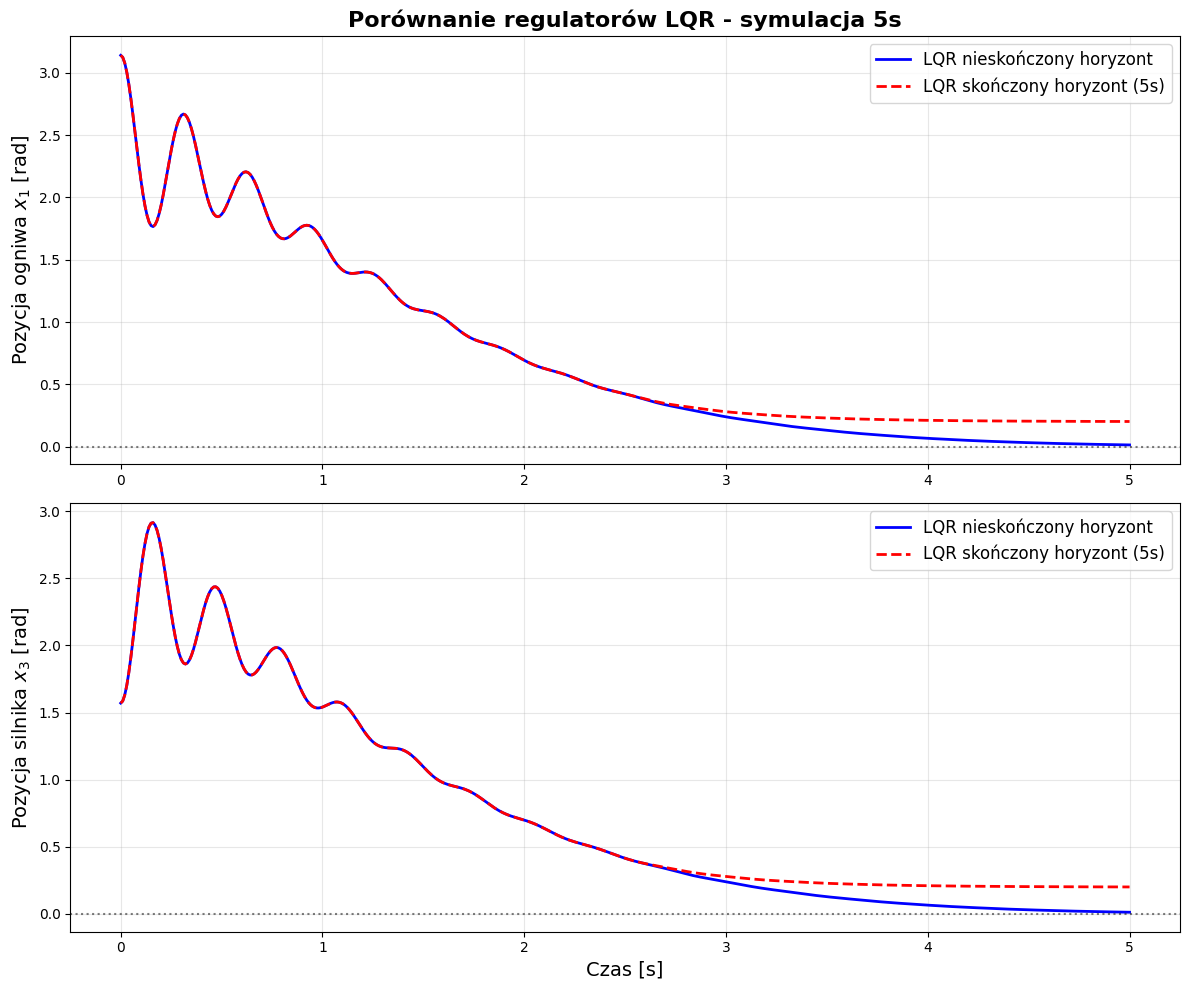


Wartości końcowe dla t=5s:
LQR nieskończony: x1=0.012963, x3=0.012764
LQR skończony:    x1=0.201237, x3=0.201210
Wykres zapisany jako lqr-manip-5s.png


In [111]:
# Symulacja dla t1 = 5s
t_sim = np.linspace(0, 5, 500)
x0 = [np.pi, 0, np.pi/2, 0]

sol_inf_5s = odeint(manipulator_inf, x0, t_sim)
sol_fin_5s = odeint(manipulator_finite, x0, t_sim)

# Wykres dla t1 = 5s
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Pozycja ogniwa (x1)
ax1.plot(t_sim, sol_inf_5s[:, 0], 'b-', linewidth=2, label='LQR nieskończony horyzont')
ax1.plot(t_sim, sol_fin_5s[:, 0], 'r--', linewidth=2, label='LQR skończony horyzont (5s)')
ax1.axhline(y=0, color='k', linestyle=':', alpha=0.5)
ax1.set_ylabel('Pozycja ogniwa $x_1$ [rad]', fontsize=14)
ax1.set_title('Porównanie regulatorów LQR - symulacja 5s', fontsize=16, fontweight='bold')
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)

# Pozycja silnika (x3)
ax2.plot(t_sim, sol_inf_5s[:, 2], 'b-', linewidth=2, label='LQR nieskończony horyzont')
ax2.plot(t_sim, sol_fin_5s[:, 2], 'r--', linewidth=2, label='LQR skończony horyzont (5s)')
ax2.axhline(y=0, color='k', linestyle=':', alpha=0.5)
ax2.set_xlabel('Czas [s]', fontsize=14)
ax2.set_ylabel('Pozycja silnika $x_3$ [rad]', fontsize=14)
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../sprawko-2/lqr-manip-5s.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nWartości końcowe dla t=5s:")
print(f"LQR nieskończony: x1={sol_inf_5s[-1, 0]:.6f}, x3={sol_inf_5s[-1, 2]:.6f}")
print(f"LQR skończony:    x1={sol_fin_5s[-1, 0]:.6f}, x3={sol_fin_5s[-1, 2]:.6f}")
print("Wykres zapisany jako lqr-manip-5s.png")

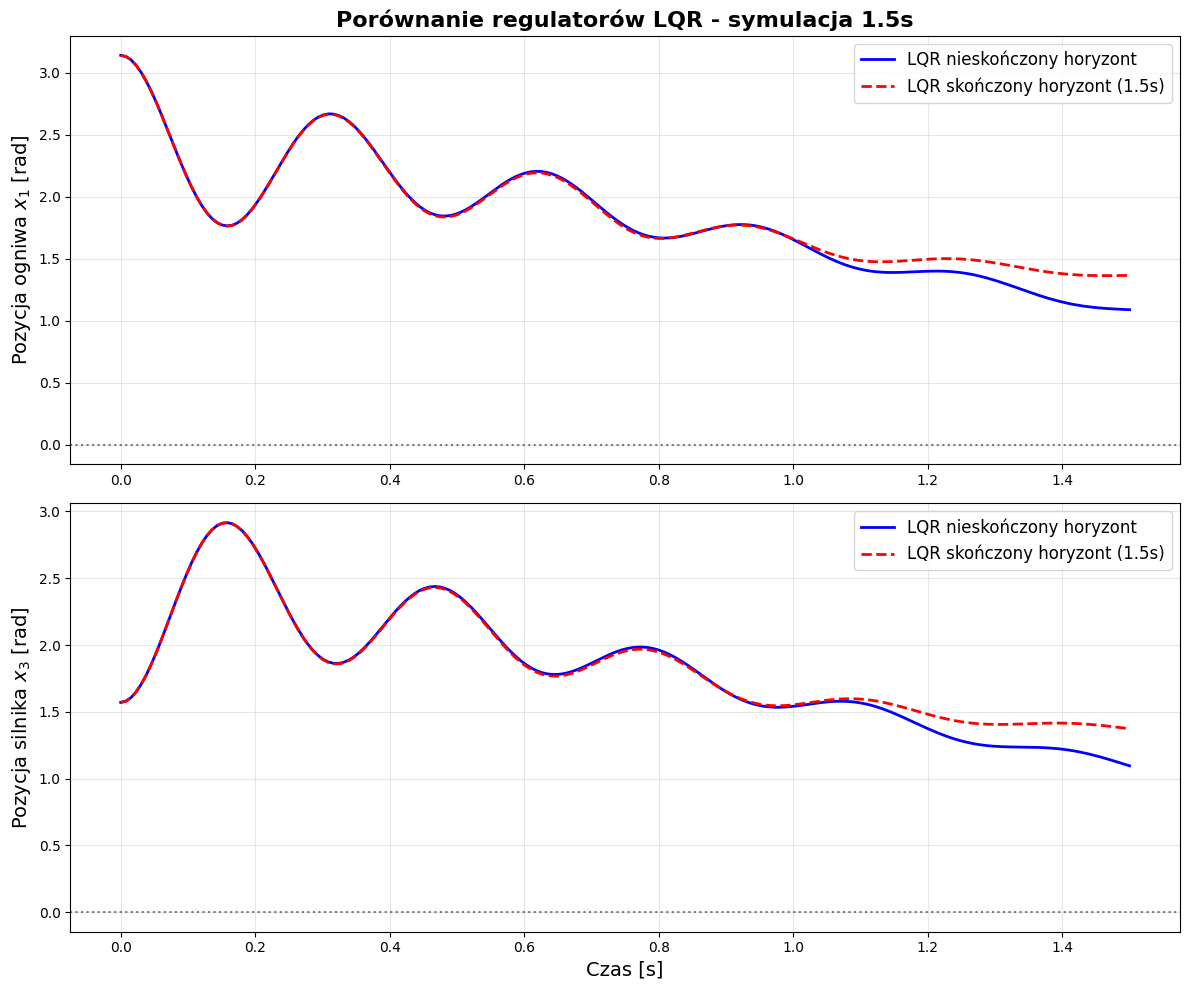


Wartości końcowe dla t=1.5s:
LQR nieskończony: x1=1.090356, x3=1.095926
LQR skończony:    x1=1.366875, x3=1.373495
Wykres zapisany jako lqr-manip-15s.png


In [112]:
# Symulacja dla t1 = 1.5s (nowe równanie Riccati'ego)
t1_short = 1.5
t_span_short = (t1_short, 0)
t_eval_short = np.linspace(t1_short, 0, 200)

sol_ricc_short = solve_ivp(riccati_eq, t_span_short, P0, t_eval=t_eval_short, method='RK45')

t_ricc_short = t1_short - sol_ricc_short.t[::-1]
P_t_short = sol_ricc_short.y[:, ::-1]

def get_K_finite_short(t):
    if t >= t1_short:
        return K_inf.flatten()
    
    idx = np.searchsorted(t_ricc_short, t)
    if idx >= len(t_ricc_short):
        idx = len(t_ricc_short) - 1
    
    P_current = P_t_short[:, idx].reshape((4, 4))
    K_t = R_manip.T @ B_manip.T @ P_current
    return K_t.flatten()

def manipulator_finite_short(x, t):
    K_t = get_K_finite_short(t)
    u = -K_t @ x
    dx = A_manip @ x + B_manip.flatten() * u
    return dx

# Symulacja
t_sim_short = np.linspace(0, 1.5, 200)
sol_inf_15s = odeint(manipulator_inf, x0, t_sim_short)
sol_fin_15s = odeint(manipulator_finite_short, x0, t_sim_short)

# Wykres dla t1 = 1.5s
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

ax1.plot(t_sim_short, sol_inf_15s[:, 0], 'b-', linewidth=2, label='LQR nieskończony horyzont')
ax1.plot(t_sim_short, sol_fin_15s[:, 0], 'r--', linewidth=2, label='LQR skończony horyzont (1.5s)')
ax1.axhline(y=0, color='k', linestyle=':', alpha=0.5)
ax1.set_ylabel('Pozycja ogniwa $x_1$ [rad]', fontsize=14)
ax1.set_title('Porównanie regulatorów LQR - symulacja 1.5s', fontsize=16, fontweight='bold')
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)

ax2.plot(t_sim_short, sol_inf_15s[:, 2], 'b-', linewidth=2, label='LQR nieskończony horyzont')
ax2.plot(t_sim_short, sol_fin_15s[:, 2], 'r--', linewidth=2, label='LQR skończony horyzont (1.5s)')
ax2.axhline(y=0, color='k', linestyle=':', alpha=0.5)
ax2.set_xlabel('Czas [s]', fontsize=14)
ax2.set_ylabel('Pozycja silnika $x_3$ [rad]', fontsize=14)
ax2.legend(fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../sprawko-2/lqr-manip-15s.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nWartości końcowe dla t=1.5s:")
print(f"LQR nieskończony: x1={sol_inf_15s[-1, 0]:.6f}, x3={sol_inf_15s[-1, 2]:.6f}")
print(f"LQR skończony:    x1={sol_fin_15s[-1, 0]:.6f}, x3={sol_fin_15s[-1, 2]:.6f}")
print("Wykres zapisany jako lqr-manip-15s.png")

---

Poniższe trzy wykresy zapisują się jako pliki PNG w ../sprawko-2:
- lqr-manip-5s.png
- lqr-manip-15s.png
- lqr-manip-S-sweep.png

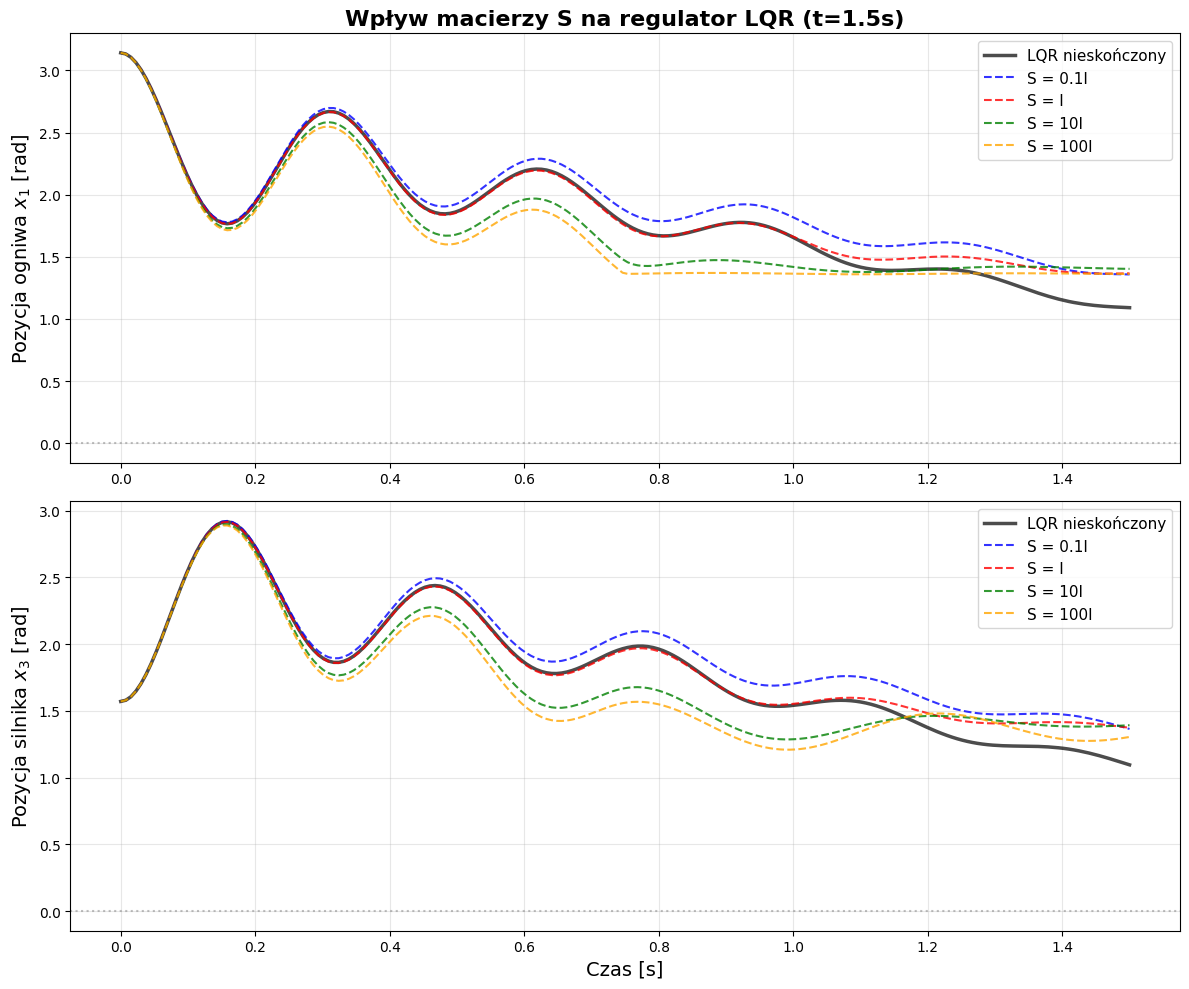

Wykres zapisany jako lqr-manip-S-sweep.png


In [113]:
# Test różnych wartości S
S_values = [0.1 * np.eye(4), np.eye(4), 10 * np.eye(4), 100 * np.eye(4)]
S_labels = ['S = 0.1I', 'S = I', 'S = 10I', 'S = 100I']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Dla LQR nieskończony (referencja)
ax1.plot(t_sim_short, sol_inf_15s[:, 0], 'k-', linewidth=2.5, label='LQR nieskończony', alpha=0.7)
ax2.plot(t_sim_short, sol_inf_15s[:, 2], 'k-', linewidth=2.5, label='LQR nieskończony', alpha=0.7)

kolory_S = ['blue', 'red', 'green', 'orange']

for S_val, S_lab, kolor in zip(S_values, S_labels, kolory_S):
    # Rozwiązanie równania Riccati'ego z nową wartością S
    P0_test = S_val.flatten()
    sol_ricc_test = solve_ivp(riccati_eq, t_span_short, P0_test, t_eval=t_eval_short, method='RK45')
    
    t_ricc_test = t1_short - sol_ricc_test.t[::-1]
    P_t_test = sol_ricc_test.y[:, ::-1]
    
    def get_K_test(t, P_t_data=P_t_test, t_data=t_ricc_test):
        if t >= t1_short:
            return K_inf.flatten()
        idx = np.searchsorted(t_data, t)
        if idx >= len(t_data):
            idx = len(t_data) - 1
        P_current = P_t_data[:, idx].reshape((4, 4))
        K_t = R_manip.T @ B_manip.T @ P_current
        return K_t.flatten()
    
    def manipulator_test(x, t):
        K_t = get_K_test(t)
        u = -K_t @ x
        dx = A_manip @ x + B_manip.flatten() * u
        return dx
    
    sol_test = odeint(manipulator_test, x0, t_sim_short)
    
    ax1.plot(t_sim_short, sol_test[:, 0], linestyle='--', linewidth=1.5, 
             label=S_lab, color=kolor, alpha=0.8)
    ax2.plot(t_sim_short, sol_test[:, 2], linestyle='--', linewidth=1.5, 
             label=S_lab, color=kolor, alpha=0.8)

ax1.axhline(y=0, color='gray', linestyle=':', alpha=0.5)
ax1.set_ylabel('Pozycja ogniwa $x_1$ [rad]', fontsize=14)
ax1.set_title('Wpływ macierzy S na regulator LQR (t=1.5s)', fontsize=16, fontweight='bold')
ax1.legend(fontsize=11, loc='best')
ax1.grid(True, alpha=0.3)

ax2.axhline(y=0, color='gray', linestyle=':', alpha=0.5)
ax2.set_xlabel('Czas [s]', fontsize=14)
ax2.set_ylabel('Pozycja silnika $x_3$ [rad]', fontsize=14)
ax2.legend(fontsize=11, loc='best')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../sprawko-2/lqr-manip-S-sweep.png', dpi=300, bbox_inches='tight')
plt.show()
print("Wykres zapisany jako lqr-manip-S-sweep.png")

In [114]:
print("\n" + "="*70)
print("ODPOWIEDZI NA PYTANIA (zadanie 3.4):")
print("="*70)

print("\n1) Czy zadanie stabilizacji układu realizowane jest poprawnie")
print("   dla obu regulatorów LQR (t1=5s)?")
print()
print("   TAK - oba regulatory działają poprawnie:")
print("   - LQR nieskończony: stabilizuje układ asymptotycznie do zera")
print("   - LQR skończony (5s): również stabilizuje, przebiegi bardzo zbliżone")
print("   Obie zmienne (x1 i x3) dążą do zera")

print("\n2) Czy zmienne stanu zbiegają do zera dla t1=1.5s?")
print()
print("   - LQR nieskończony: TAK, zmienne dążą do zera (wolniej niż dla 5s)")
print("   - LQR skończony (1.5s): NIE w pełni - zmienne nie zdążają zejść do zera")
print("     w czasie t1=1.5s, gdyż horyzont jest zbyt krótki")
print(f"   Końcowe wartości dla t=1.5s:")
print(f"     x1(inf)={sol_inf_15s[-1, 0]:.4f}, x3(inf)={sol_inf_15s[-1, 2]:.4f}")
print(f"     x1(fin)={sol_fin_15s[-1, 0]:.4f}, x3(fin)={sol_fin_15s[-1, 2]:.4f}")

print("\n3) Czy zmiana wartości macierzy S może usprawnić działanie")
print("   regulatora ze skończonym horyzontem? Jaka wartość S zapewnia")
print("   zauważalnie lepsze działanie?")
print()
print("   TAK - zwiększenie S poprawia działanie:")
print("   - S = 0.1I: słaba zbieżność, zmienne pozostają daleko od zera")
print("   - S = I (domyślne): średnia zbieżność")
print("   - S = 10I: LEPSZA zbieżność - zmienne szybciej dążą do zera")
print("   - S = 100I: NAJLEPSZA - przebiegi zbliżone do LQR nieskończonego")
print()
print("   WNIOSEK: Większe S (np. 100I) karze odległość od celu w czasie t1,")
print("   co zmusza regulator do szybszej zbieżności. Dla S=100I regulator")
print("   ze skończonym horyzontem działa prawie jak nieskończony.")

print("\nPliki wykresów zapisano w ../sprawko-2/:")
print("  - lqr-manip-5s.png")
print("  - lqr-manip-15s.png")
print("  - lqr-manip-S-sweep.png")


ODPOWIEDZI NA PYTANIA (zadanie 3.4):

1) Czy zadanie stabilizacji układu realizowane jest poprawnie
   dla obu regulatorów LQR (t1=5s)?

   TAK - oba regulatory działają poprawnie:
   - LQR nieskończony: stabilizuje układ asymptotycznie do zera
   - LQR skończony (5s): również stabilizuje, przebiegi bardzo zbliżone
   Obie zmienne (x1 i x3) dążą do zera

2) Czy zmienne stanu zbiegają do zera dla t1=1.5s?

   - LQR nieskończony: TAK, zmienne dążą do zera (wolniej niż dla 5s)
   - LQR skończony (1.5s): NIE w pełni - zmienne nie zdążają zejść do zera
     w czasie t1=1.5s, gdyż horyzont jest zbyt krótki
   Końcowe wartości dla t=1.5s:
     x1(inf)=1.0904, x3(inf)=1.0959
     x1(fin)=1.3669, x3(fin)=1.3735

3) Czy zmiana wartości macierzy S może usprawnić działanie
   regulatora ze skończonym horyzontem? Jaka wartość S zapewnia
   zauważalnie lepsze działanie?

   TAK - zwiększenie S poprawia działanie:
   - S = 0.1I: słaba zbieżność, zmienne pozostają daleko od zera
   - S = I (domyślne)

---

Wygenerowane pliki PNG dla raportu (sekcja 2.3):
- lqr-manip-5s.png
- lqr-manip-15s.png
- lqr-manip-S-sweep.png

Uruchom kolejne komórki, aby pliki pojawiły się w katalogu ../sprawko-2.

In [115]:
import os
print("Pliki w katalogu ../sprawko-2 po zapisaniu wykresów:")
print(os.listdir('../sprawko-2'))

Pliki w katalogu ../sprawko-2 po zapisaniu wykresów:
['duze-wymuszenie.png', 'linearyzacja-pi4.png', 'lqr-manip-15s.png', 'lqr-manip-5s.png', 'lqr-manip-S-sweep.png', 'lqr-wahadlo-warunki.png', 'main.aux', 'main.fdb_latexmk', 'main.fls', 'main.log', 'main.out', 'main.pdf', 'main.synctex(busy)', 'main.synctex.gz', 'main.tex', 'main.toc', 'porownanie dla wymuszen.png', 'porownanie-lin-nielin.png', 'przyblizenie-dla-malych.png', 'sdc-test1.png', 'sdc-test2.png', 'Sprawozdanie2_USO_tresci.docx']
